#**Project Description**

#**Business Context**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **Data Description**
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.italicized text

### Attribute Information:
  Date : year-month-day

  Rented Bike count - Count of bikes rented at each hour

  Hour - Hour of he day

  Temperature-Temperature in Celsius

  Humidity - %

  Windspeed - m/s 

  Visibility - 10m

  Dew point temperature - Celsius

  Solar radiation - MJ/m2

  Rainfall - mm

  Snowfall - cm

  Seasons - Winter, Spring, Summer, Autumn

  Holiday - Holiday/No holiday

  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)
 


In [1]:
# Importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

## Exploring the Dataset

In [3]:
# Exploring the Dataset

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.shape

(8760, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
len(df)

8760

## preprocessing the dataset

**Data preprocessing is an important step in the data mining process. The phrase “garbage in, garbage out” is particularly applicable to data mining and machine learning projects. Data-gathering methods are often loosely controlled, resulting in out-of-range values, impossible data combinations, missing values, etc.**

In [9]:
# Duplicates Values 

duplicates =len(df[df.duplicated()])
duplicates

0

here is no any duplicate values 


In [10]:
# Null Values

df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

here is no any null data are presents

**Our data set varies from 2017-2018,
so i think its must be converted into year month day formate,because year formate has only 2 unique number **

In [11]:
# now converting our date column into 3 diff columns (year,month,day)

import datetime as dt

In [12]:
df['date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))


In [13]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()

In [14]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['week']=df['day'].apply(lambda x : "weekend" if x=='Saturday' or x=='Sunday' else "weekday" )

In [15]:
# checking no of years
df['week'].value_counts()

weekday    6264
weekend    2496
Name: week, dtype: int64

In [16]:
df=df.drop(columns=['date','day','year'],axis=1)

In [17]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,week
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday


I have transformed the "date" column into three separate columns: "year", "month", and "day". I have decided to drop the "year" column as it only contains two unique values, and the "day" column as I only need to know if a day is a weekday or a weekend. I have transformed the "day" column into this format and dropped it

In [18]:
#Change the int64 column into catagory column
cols=['Hour','month','week']
for col in cols:
  df[col]=df[col].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   object  
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   category
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall(mm)               8760 non-null   float64 
 10  Snowfall (cm)              8760 non-null   float64 
 11  Seasons                    8760 non-null   object  
 12  Holiday                    8760 non-null   object  
 13  Functioning Day            8760 n

In [20]:
import seaborn as sns

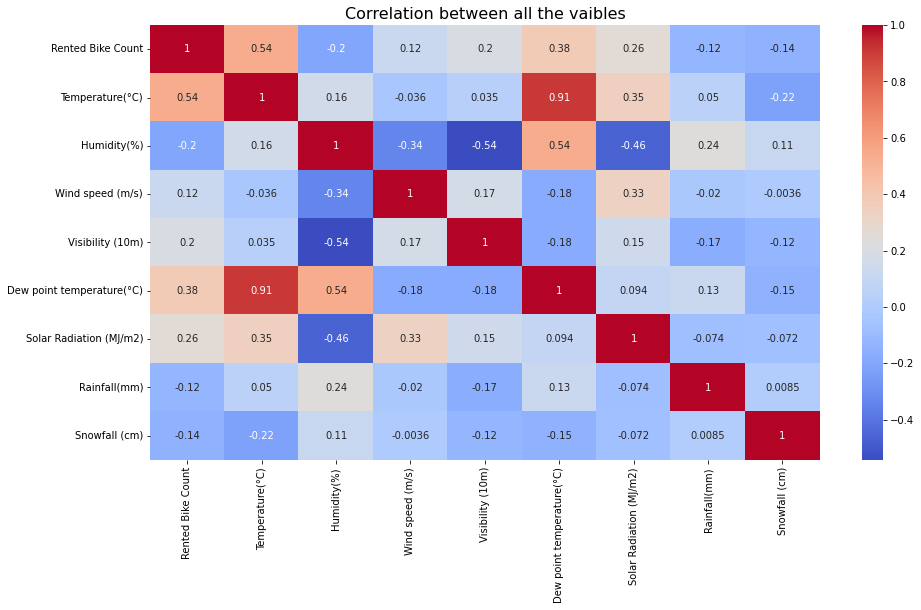

In [21]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

From the above experiment i can conclude that Temperature and Dew point temperature(°C) has the high correlation . we drop this column then it dont affects the outcome of our analysis

In [22]:
df.drop(columns=['Dew point temperature(°C)'],inplace=True)

# Removing Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

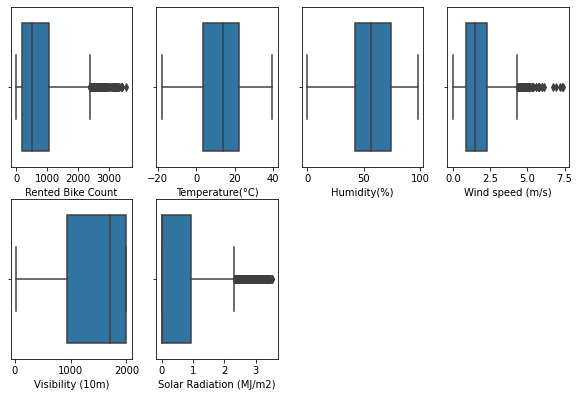

In [23]:
# looking for outliers using box plot
plt.figure(figsize=(10,10))
for index,item in enumerate([i for i in df.describe().columns.to_list() if i not in ['Rainfall(mm)','Snowfall (cm)']]):
  plt.subplot(3,4,index+1)
  sns.boxplot(df[item])

**An outlier is an observation that is numerically distant from the rest of the data. When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.**

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scalar=StandardScaler()

In [26]:
from pandas_profiling import ProfileReport

In [27]:
#ProfileReport(pd.DataFrame(scalar.fit_transform(df)))
# Due to some error it is not loading it will be done later 

In [28]:
# finding the inter-quartile range 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count           874.25
Temperature(°C)              19.00
Humidity(%)                  32.00
Wind speed (m/s)              1.40
Visibility (10m)           1060.00
Solar Radiation (MJ/m2)       0.93
Rainfall(mm)                  0.00
Snowfall (cm)                 0.00
dtype: float64


In [29]:
# making a automated fn for removing the Outliers 
'''def outliers_removal(self,data):
  Q3,Q1=np.nanpercentile(col,[75,25])
  IQR=Q3-Q1
  UL=Q3+1.5*IQR
  LL=Q1-1.5*IQR
  return UL,LL'''


'def outliers_removal(self,data):\n  Q3,Q1=np.nanpercentile(col,[75,25])\n  IQR=Q3-Q1\n  UL=Q3+1.5*IQR\n  LL=Q1-1.5*IQR\n  return UL,LL'

In [30]:
# listing features to remove outliers

features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning Day','month','year','week']
new_features = [x for x in features if x not in list_0]

In [31]:
new_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [32]:
# removing outliers

df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-32-c5f08b4fac2d>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Date                     8760 non-null   object  
 1   Rented Bike Count        8760 non-null   int64   
 2   Hour                     8760 non-null   category
 3   Temperature(°C)          7078 non-null   float64 
 4   Humidity(%)              7078 non-null   float64 
 5   Wind speed (m/s)         7078 non-null   float64 
 6   Visibility (10m)         7078 non-null   float64 
 7   Solar Radiation (MJ/m2)  7078 non-null   float64 
 8   Rainfall(mm)             7078 non-null   float64 
 9   Snowfall (cm)            7078 non-null   float64 
 10  Seasons                  8760 non-null   object  
 11  Holiday                  8760 non-null   object  
 12  Functioning Day          8760 non-null   object  
 13  month                    8760 non-null   category
 14  week    

# handling null values

There are many ways of hanlding the null values:
1. Drop rows or columns that have a missing values
2. Filling with Zeros.
3. Forward and Backward Fill.
4. Mean and Median Fill.
5. Mean and Median Fill with Groupby.

A/q to our dataset we will replace our nan values by this methods

In [34]:
# filling null values with mean values

df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())
df['Visibility (10m)'] = df['Visibility (10m)'].fillna(df['Visibility (10m)'].mean())

df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].mean())
df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())
df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].mean())

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Date                     8760 non-null   object  
 1   Rented Bike Count        8760 non-null   int64   
 2   Hour                     8760 non-null   category
 3   Temperature(°C)          8760 non-null   float64 
 4   Humidity(%)              8760 non-null   float64 
 5   Wind speed (m/s)         8760 non-null   float64 
 6   Visibility (10m)         8760 non-null   float64 
 7   Solar Radiation (MJ/m2)  8760 non-null   float64 
 8   Rainfall(mm)             8760 non-null   float64 
 9   Snowfall (cm)            8760 non-null   float64 
 10  Seasons                  8760 non-null   object  
 11  Holiday                  8760 non-null   object  
 12  Functioning Day          8760 non-null   object  
 13  month                    8760 non-null   category
 14  week    

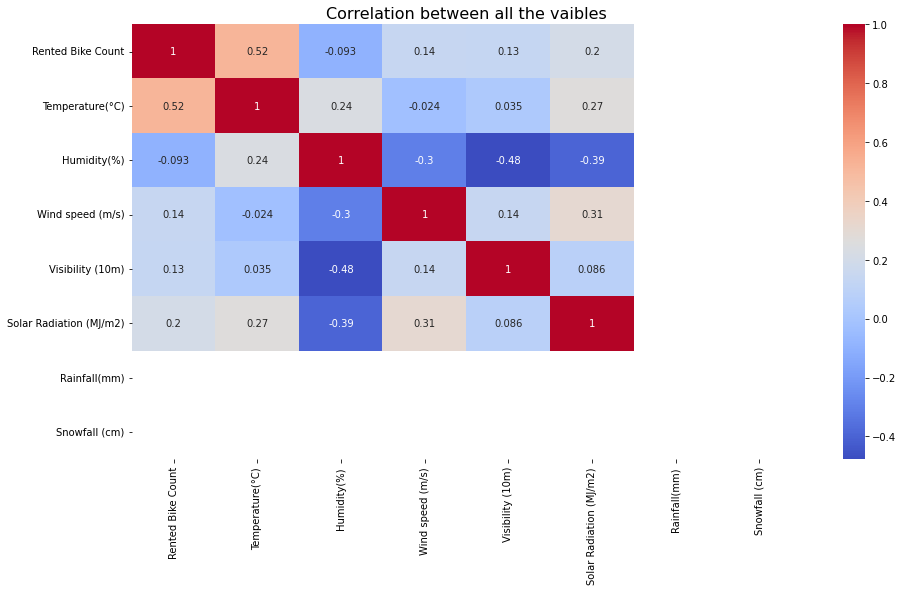

In [36]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

# Performing EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In [37]:
# Information about the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Date                     8760 non-null   object  
 1   Rented Bike Count        8760 non-null   int64   
 2   Hour                     8760 non-null   category
 3   Temperature(°C)          8760 non-null   float64 
 4   Humidity(%)              8760 non-null   float64 
 5   Wind speed (m/s)         8760 non-null   float64 
 6   Visibility (10m)         8760 non-null   float64 
 7   Solar Radiation (MJ/m2)  8760 non-null   float64 
 8   Rainfall(mm)             8760 non-null   float64 
 9   Snowfall (cm)            8760 non-null   float64 
 10  Seasons                  8760 non-null   object  
 11  Holiday                  8760 non-null   object  
 12  Functioning Day          8760 non-null   object  
 13  month                    8760 non-null   category
 14  week    

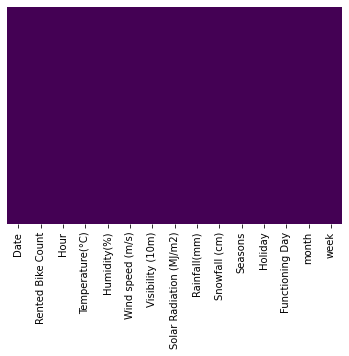

In [38]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

<Figure size 720x720 with 0 Axes>

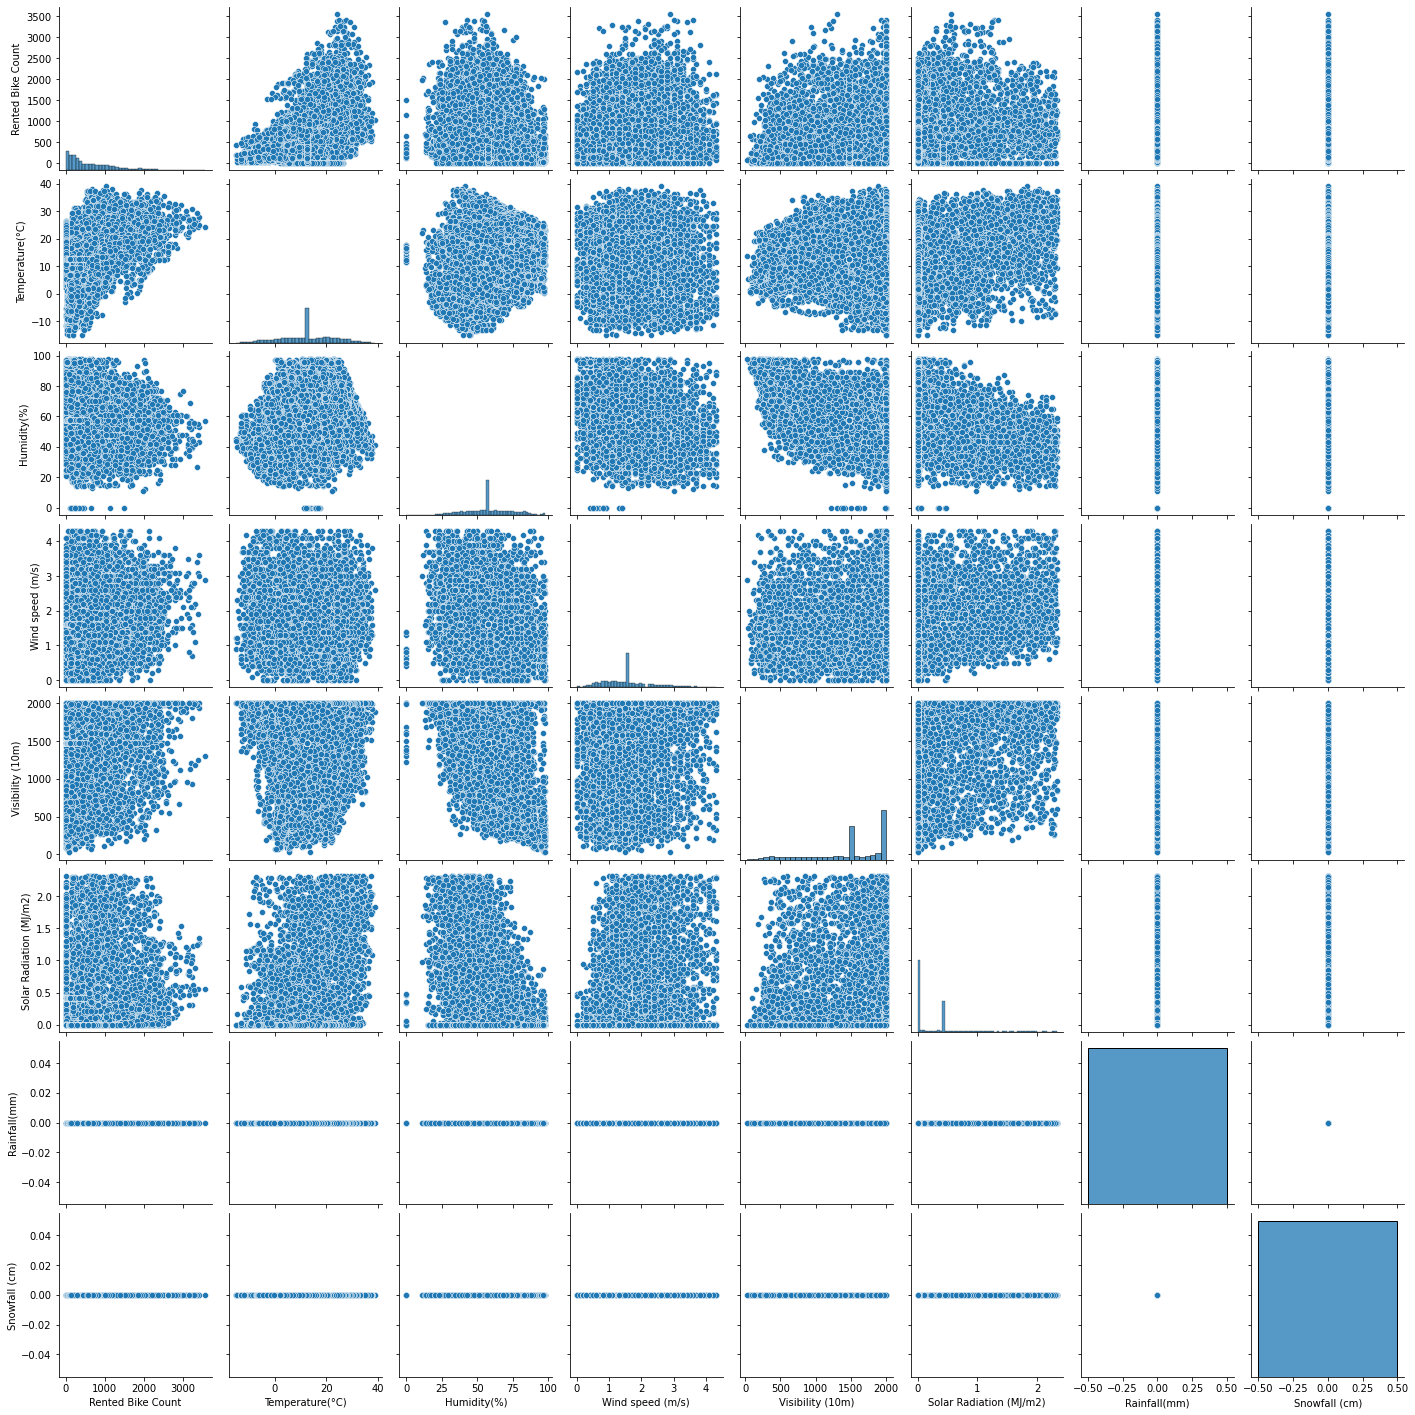

In [39]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df);

Now go for the vizulaisation from the help of date time month 

[Text(0.5, 1.0, 'Rented bikes acording to Month ')]

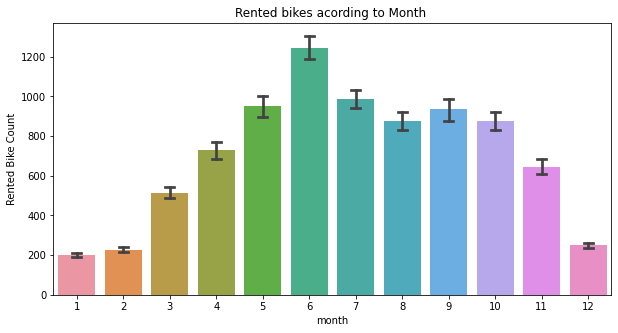

In [40]:
plt,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Rented bikes acording to Month ')

we see here our bike is rented mostly from 5 to 10 of the months

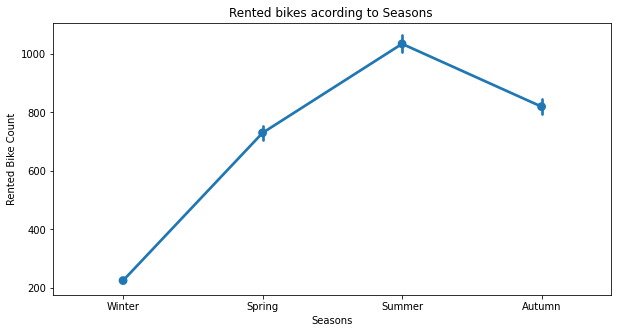

In [41]:
plt,ax=plt.subplots(figsize=(10,5))
sns.set_style('whitegrid')
sns.pointplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax)
ax.set(title='Rented bikes acording to Seasons ');

There is difference between season on the rent of bike . In the summer season the use of rented bike is high as compare to winter season. 

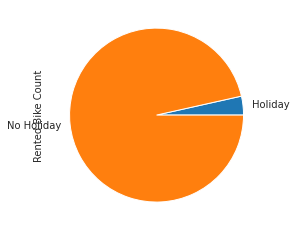

In [49]:
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=1);

In [50]:

# creating dummy variables for categorical feature --> Seasons, month, DayOfWeek, year, fuctioning day, holiday

seasons = pd.get_dummies(df['Seasons'])

working_day = pd.get_dummies(df['Holiday'])

F_day = pd.get_dummies(df['Functioning Day'])

month = pd.get_dummies(df['month'])

week_day = pd.get_dummies(df['week'])


In [51]:
df = pd.concat([df,seasons,working_day,F_day,month,week_day],axis=1)

In [52]:
# checking the data dummy variable is created or not

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,5,6,7,8,9,10,11,12,weekday,weekend
0,01/12/2017,254,0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,01/12/2017,204,1,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,01/12/2017,173,2,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,01/12/2017,107,3,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
4,01/12/2017,78,4,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [53]:
## dropping columns for which dummy variables were created

df.drop(['Seasons','Holiday','Functioning Day','week','month'],axis=1,inplace=True)

In [57]:
df.drop(['Date'],axis=1,inplace=True) # droping date because we already extract the date from the data

In [58]:
df=df.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1)

In [61]:
x=df

In [62]:
#Assign the value in X and Y
x = df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df['Rented Bike Count'])

In [63]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Autumn,Spring,Summer,Winter,...,5,6,7,8,9,10,11,12,weekday,weekend
0,0,-5.2,37.0,2.2,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,-5.5,38.0,0.8,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,2,-6.0,39.0,1.0,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,3,-6.2,40.0,0.9,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,4,-6.0,36.0,2.3,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [64]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [66]:
# Creating train test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)


In [67]:
x_train.shape
x_test.shape

(2190, 27)

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature

# Linear regression Model

**A linear regression model describes the relationship between a dependent variable, y, and one or more independent variables, X. The dependent variable is also called the response variable. Independent variables are also called explanatory or predictor variables.**

In [71]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(x_train, y_train)

In [72]:
reg.score(x_train,y_train)

0.6030111076694047

In [73]:
reg.coef_

array([ 3.75003221e+00,  4.07962345e+00, -2.07879394e+00,  3.79677535e-01,
       -7.97208343e-02, -1.47273584e-01, -2.80663822e+13,  1.70714552e+13,
       -1.85708860e+12,  6.13735841e+12,  6.95521247e-01, -1.43286564e+13,
       -1.43286564e+13, -1.98188847e+11, -1.87511556e+11, -7.16970901e+12,
       -7.12841259e+12, -7.18144504e+12,  4.85630353e+12,  4.94666214e+12,
        4.93041008e+12,  2.13284737e+13,  2.18150688e+13,  2.18327916e+13,
       -1.96600055e+11, -9.21889586e+12, -9.21889586e+12])

In [75]:
#get the X_train and X-test value
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

In [76]:
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)

In [77]:
r2_lr

0.6030111076694047

# Decision Tree

**A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes**

In [82]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [83]:
Y_pred_train =model.predict(x_train)
Y_pred_train

array([19.55740252, 29.37807057, 11.04536102, ..., 28.25295474,
       20.02498439, 22.64950331])

In [84]:
Y_pred_test = model.predict(x_test)
Y_pred_test

array([19.79898987, 24.49489743, 14.62873884, ..., 35.02727296,
        0.        , 20.85281734])

In [85]:
r2_score(Y_pred_train,y_train)

0.9565092151304044

In [86]:
DT = r2_score(Y_pred_test,y_test)
DT

0.7619882672759375

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
# Decision Tree with gridsearch cv

# Tunning the hyper parameters with GridSearchCV
param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

regressor_gs_cv =GridSearchCV(regressor ,param,scoring='r2',cv=5)
regressor_gs_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 4, 5, 6, 7, 10, 15, 20, 8]},
             scoring='r2')

In [90]:
regressor_gs_cv.best_estimator_


DecisionTreeRegressor(max_depth=10, random_state=0)

In [92]:
#checking the score with best parameters
DT_with_cv = regressor_gs_cv.score(x_test,y_test)
DT_with_cv

0.8013257980814106